check compilers: g++
🤘 cadnaPromise 🤘
Using the compiler: g++
We are working with 1 file and 18 different types
The expectation is 2 digits.
a) Get a reference result with cadna (double)
b) Check with highest format (Double)
c) Delta-Debug Single/Double



We test C=[4, 5, 6, 7] 👍                                    | 0 it. [?it/s]
We test C=[4, 5, 6, 7, 8, 9, 10, 11, 12] 👍                  | 1 it. [ 4.50s/it]
We test C=[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] 👍          | 2 it. [ 2.69s/it]
We test C=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] 👍    | 3 it. [ 2.81s/it]
We test C=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17] 👍m| 4 it. [ 2.86s/it]
We test C=[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17] 👍5 it. [ 3.15s/it]
Compilation failed 👎                                               6 it. [ 2.56s/it]
                     0%|████████████████████████████████| 6 it. [ 2.56s/it]
                                                                                



The final result contains 2x double and 16x float.
It tooks 23.57s
👉 21 compilations (13 failed) for 18.70s
👉 8 executions   (0 failed) for 2.53s
{'double': {1, 15}, 'float': {0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17}}
check compilers: g++
🤘 cadnaPromise 🤘
Using the compiler: g++
We are working with 1 file and 18 different types
The expectation is 4 digits.
a) Get a reference result with cadna (double)
b) Check with highest format (Double)
c) Delta-Debug Single/Double



We test C=[4, 5, 6, 7] 👍                                    | 0 it. [?it/s]
We test C=[4, 5, 6, 7, 8, 9, 10, 11, 12] 👍                  | 1 it. [ 4.58s/it]
We test C=[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] 👍          | 2 it. [ 2.71s/it]
We test C=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] 👍    | 3 it. [ 2.84s/it]
We test C=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17] 👍m| 4 it. [ 2.91s/it]
We test C=[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17] 👍5 it. [ 3.19s/it]
Compilation failed 👎                                               6 it. [ 2.58s/it]
                     0%|████████████████████████████████| 6 it. [ 2.58s/it]
                                                                                



The final result contains 2x double and 16x float.
It tooks 23.39s
👉 21 compilations (13 failed) for 18.58s
👉 8 executions   (0 failed) for 2.48s
{'double': {1, 15}, 'float': {0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17}}


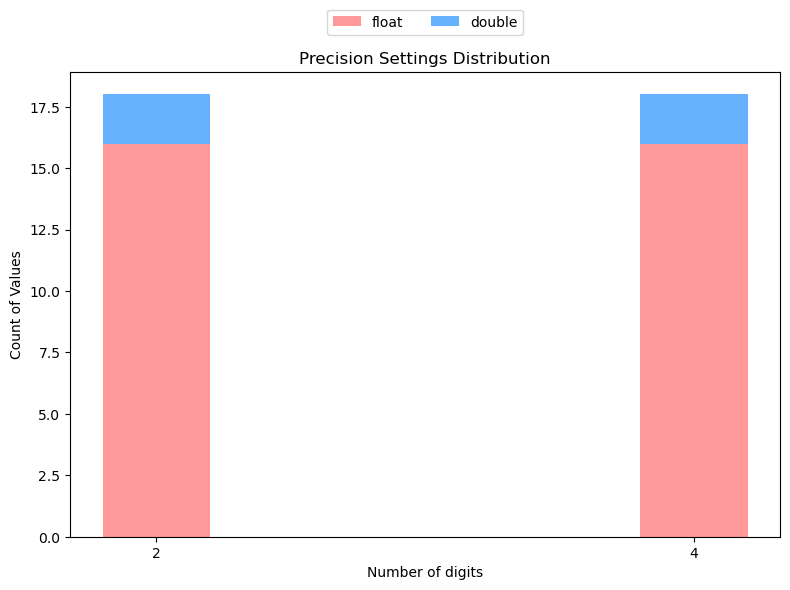

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from cadnaPromise.run import runPromise

method = 'sd'

digits = [2, 4]
precision_settings = list()


if __name__ == "__main__":
    for digit in digits:
        testargs = ['--precs='+method, '--nbDigits=' + str(digit),
                    '--conf=promise.yml', '--noParsing', '--fp=fp.json']
        
        t = runPromise(testargs)
        print(t)
        precision_settings.append(t)

    categories = ['double', 'float', 'half_float::half', 'flx::floatx<8, 7>']
    x = digits
    
    heights = {cat: [] for cat in categories}
    categories_new = []
    for setting in precision_settings:
        for cat in categories:
            if cat in heights and cat in setting:
                heights[cat].append(len(setting[cat]))
                categories_new.append(cat)
                        
    categories  = set(categories_new)
    
    heights = {height: heights[height] for height in heights}
    fig, ax = plt.subplots(figsize=(8, 6))
    
    bottom = np.zeros(len(precision_settings))
    
    colors = ['#FF9999', '#66B2FF', '#99FF99']
    for i, category in enumerate(categories):
        ax.bar(x, heights[category], bottom=bottom, label=category, 
            color=colors[i], width=0.4)
        
        bottom += heights[category]
    
    ax.set_xlabel('Number of digits')
    ax.set_ylabel('Count of Values')
    ax.set_title('Precision Settings Distribution')
    ax.set_xticks(x)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
    
    for i in range(len(precision_settings)):
        total_height = sum(heights[cat][i] for cat in categories if cat in heights)
    
    plt.tight_layout()
    plt.savefig('precision_dt.png', bbox_inches='tight', dpi=300)
    plt.show()